# Preprocessing(1)

- 전처리.
- 텍스트 데이터를 어떻게 처리할 수 있을까.
- NLP 기반 텍스트 마이닝.

## KoNLPy, NLTK

In [1]:
# NLTK 설치하기
!pip install nltk

### Tokenizing

In [4]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cdetg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
import sqlite3
con = sqlite3.connect("news.db")
cur = con.cursor()

In [15]:
cur.execute("""
    SELECT content
    FROM table2
    ORDER BY id ASC
""")
corpus = [_[0] for _ in cur.fetchall()]

In [27]:
len(corpus[0]), len(corpus[0].split()), len(corpus[0].splitlines())

(1942, 424, 51)

In [28]:
# 어절 519개. 
len(word_tokenize(corpus[0])), len(sent_tokenize(corpus[0]))

(519, 23)

In [ ]:
# 이거는 오류나니 참고만 하기
# 출력값 (형태소 분석한 개수, 어절 단위로 쪼갠 개수)
from konlpy.tag import Kkma
len(Kkma().morphs(corpus[0])), len(word_tokenize(corpus[0]))

In [17]:
# 실제 23개의 문장이 있다.
from nltk.tokenize import sent_tokenize
len(sent_tokenize(corpus[0]))

23

In [18]:
corpus[0].splitlines()[0]

'1년 반만에 또 분당의 길로…당권파·반당권파 갈등 폭발 조짐'

In [19]:
sent_tokenize(corpus[0])[0]

"1년 반만에 또 분당의 길로…당권파·반당권파 갈등 폭발 조짐\n\n(서울=연합뉴스) 설승은 기자 = 민주평화당이 17일 옛 국민의당에서 분당해 창당한 지 1년 5개월 만에 또다시 '분당열차'에 올라탔다."

In [22]:
sent_tokenize("""
    Life is too short, Life is too short
    Life is too short
""")

['\n    Life is too short, Life is too short\n    Life is too short']

In [23]:
# 중간에 .(온점)을 넣으니 문장을 잘랐다.
sent_tokenize("""
    Life is too short. Life is too short
    Life is too short
""")

['\n    Life is too short.', 'Life is too short\n    Life is too short']

In [24]:
# 중간에 ..... 말줄임은 안자르네.
sent_tokenize("""
    Life is too short..... Life is too short
    Life is too short
""")

['\n    Life is too short..... Life is too short\n    Life is too short']

In [21]:
# 구두점을 기반으로 해서 짜른다.
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
# 하나의 어절 단위로 매핑.
from nltk.tokenize import word_tokenize
word_tokenize("Life is too short, Life is too short")

['Life', 'is', 'too', 'short', ',', 'Life', 'is', 'too', 'short']

In [26]:
word_tokenize("""
    술 한잔 마셨습니다...
    "저"도 더 이상 '어'쩔 수 없습니다.
    ...최선을 다했고 열심히 했습니다.
    저의 진심이 느껴지길 바랍니다. 고맙습니다....
""")

['술',
 '한잔',
 '마셨습니다',
 '...',
 '``',
 '저',
 "''",
 '도',
 '더',
 '이상',
 "'",
 '어',
 "'",
 '쩔',
 '수',
 '없습니다',
 '.',
 '...',
 '최선을',
 '다했고',
 '열심히',
 '했습니다',
 '.',
 '저의',
 '진심이',
 '느껴지길',
 '바랍니다',
 '.',
 '고맙습니다',
 '...',
 '.']

    '마음' : 다섯 개의 음소
    '마음' : 두 개의 음절
    '저의 진심이' : 두 개의 어절

In [31]:
# 우리나라는 상관이 별루 읍다. 본인의 감정상태를 얻음
from nltk.tokenize import TweetTokenizer
word_tokenize("You need Python =)")

['You', 'need', 'Python', '=', ')']

In [34]:
TweetTokenizer().tokenize("You need Python =);(")

['You', 'need', 'Python', '=)', ';(']

In [40]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b(\w+)\b") # 영어와 숫자로만 이루어진 어절 찾기
#pattern = re.compile(r"\b([가-힣]+)\b") # 한글 찾기
regexp_tokenize("You need Python!!!! 12 한글", pattern)

['You', 'need', 'Python', '12', '한글']

In [41]:
re.sub(r"[^가-힣]", "", "ㅠㅠ ㅜㅜ ㅋㅋ 한글")

'한글'

In [42]:
regexp_tokenize(re.sub(r"[^가-힣]", "", "ㅠㅠ ㅜㅜ ㅋㅋ 한글"), pattern)

['한글']

In [45]:
from nltk import Text
text = Text(word_tokenize(corpus[0])) # 어절로.

In [46]:
# N - 전체 인스턴스 개수, B - 유니크 개수.
text.vocab().B(), text.vocab().N()

(365, 519)

In [47]:
text.vocab().most_common(30)

[('.', 21),
 ("'", 8),
 ('등', 8),
 ('``', 8),
 ("''", 8),
 ('(', 7),
 (')', 7),
 ('있다', 7),
 ('제3지대', 5),
 ('의원', 5),
 ('정', 5),
 ('반당권파는', 4),
 (',', 4),
 ('서울=연합뉴스', 3),
 ('기자', 3),
 ('=', 3),
 ('에', 3),
 ('민주평화당', 3),
 ('정동영', 3),
 ('대표', 3),
 ('대표가', 3),
 ('@', 3),
 ('yna.co.kr', 3),
 ('지난', 3),
 ('정당', 3),
 ('창당을', 3),
 ('유성엽', 3),
 ('대안정치', 3),
 ('바른미래당', 3),
 ('것은', 3)]

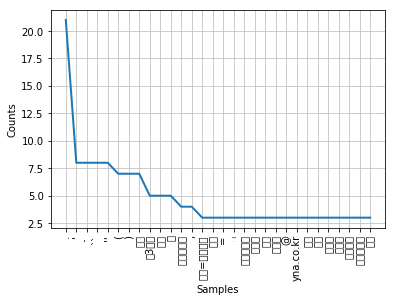

In [50]:
text.plot(30)

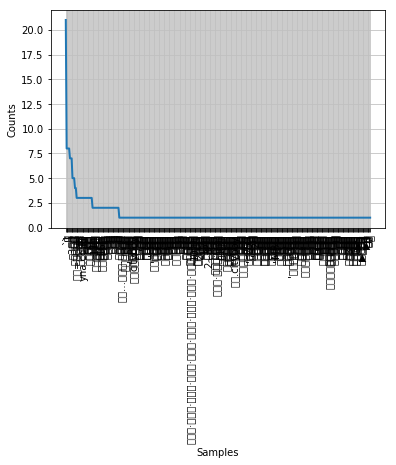

In [51]:
text.plot()

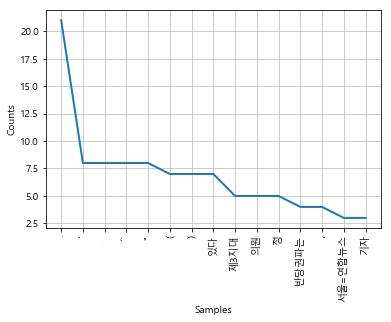

In [53]:
from matplotlib import rc, font_manager

path = "c:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font)

text.plot(15)

## Empirical Law

In [54]:
# 지프의 법칙 : 어느 것이 더 중요도가 높은지에 대해 도움을 준다.
text.vocab()
# 제 3지대 이외에는 다 쓸모가 없다.

FreqDist({'.': 21, "'": 8, '등': 8, '``': 8, "''": 8, '(': 7, ')': 7, '있다': 7, '제3지대': 5, '의원': 5, ...})

In [55]:
text.vocab().freq("제3지대")

0.009633911368015413

In [56]:
ratio = 0.0
for _ in [_[0] for _ in text.vocab().most_common(10)]:
    ratio += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ratio)

# 전체의 단어 중 "제3지대"가 16% 나 있다는 것이다.

0.04046242774566474
0.015414258188824663
0.015414258188824663
0.015414258188824663
0.015414258188824663
0.01348747591522158
0.01348747591522158
0.01348747591522158
0.009633911368015413
0.009633911368015413
0.161849710982659


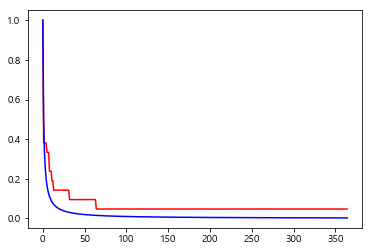

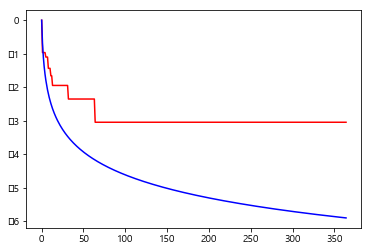

In [60]:
import matplotlib.pyplot as plt
from math import log
token = [_[0] for _ in sorted(text.vocab().items(), key=lambda x : x[1], reverse=True)]
freq = [_[1]/text.vocab().most_common(1)[0][1]
        for _ in sorted(text.vocab().items(), key=lambda x : x[1], reverse=True)]

_freq = [log(_) for _ in freq]
rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]

plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()

plt.plot([i for i in range(len(token))], _freq, "r-")
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()

### Heaps' law

- M =kT^b
- k, b == 특정 상수
- T = 전체 단어 수

In [75]:
K = 10#10 - 100
B = 0.5#0.4 - 0.6
unique = list()
total = list()
largeText = ""
heaps = list()
for _ in corpus:
    largeText += _
    text = Text(largeText)
    unique.append(text.vocab().B())
    total.append(text.vocab().N())
    heaps.append(K*text.vocab().N()**B)

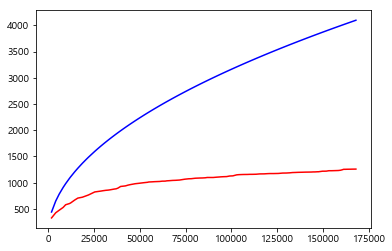

In [76]:
plt.plot(total, unique, "r-")
plt.plot(total, heaps, "b-")
plt.show()

### n-gram

- language model
- 빈도와 통계적인 정보를 가짐.
- 한글에서는 피쳐를 어떻게 추출할까. 거기에서 더 나아가 어간을 찾기 좋은 방법
- 많은 쌍들을 보고 다음에 무엇이 올까 예측.

In [ ]:
sentence = "Life is too short, You need Python"
N=2
Python?
P(Python|need, You, short, too, is, Life)
P(Python|need)
P(need|You)
N=3
P(Python|need, You)
P(need|You) P(Python|need) # 어절 단위의 n-gram
술 한잔 마셨습니다.
아버지 + 가 # 어간 추출
술한잔마셨습니다. #띄어쓰기 판단도구로도 씀.

In [92]:
# n-gram 으로 패턴 만들기
sentence = "Life is too short, You need Python"

def eojeol(sentence, N=2):
    #문장,문단을 받아서 N이 3이면 바로 2개전까지 돌거다.
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
     #   ngram.append(" ".join(tokens[i:i+N])) # 띄어쓰기 포함
         ngram.append(tuple(tokens[i:i+N])) 
    return ngram

def umjeol(token, N=2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append(" ".join(tokens[i:i+N])) # 띄어쓰기 포함
     #    ngram.append(tuple(tokens[i:i+N])) 
    return ngram

eojeol(sentence, 3)
umjeol(corpus[0].splitlines()[0])
len(umjeol(corpus[0]))

1941

In [ ]:
list("")

In [79]:
from collections import defaultdict

freq = defaultdict(int)
for _ in eojeol(corpus[0]):
    freq[_] += 1

In [81]:
# 제일 많이 나타난 상위 10개 출력
sorted(freq.items(), key=lambda x:x[1], reverse=True)[:10]

[(('있다', '.'), 6),
 (('(', '서울=연합뉴스'), 3),
 (('서울=연합뉴스', ')'), 3),
 (('기자', '='), 3),
 (("'", '에'), 3),
 (('@', 'yna.co.kr'), 3),
 (('제3지대', '정당'), 3),
 (('의원', '등'), 3),
 (('말했다', '.'), 3),
 (('.', '정'), 3)]

In [82]:
freq[('있다', '.')]/sum(freq.values())

0.011583011583011582

In [85]:
freq[('있다', '.')]/sum(freq.values()) * freq[('있다', '.')]/sum(freq.values()) * \
freq[('(', '서울=연합뉴스')]/freq[('서울=연합뉴스', ')')]

0.0001341661573321805

In [86]:
# 괄호로 끝나는 경우
[_ for _ in freq if _[1] == ")"]

[('서울=연합뉴스', ')'), ('反', ')'), ("'", ')'), ('순', ')'), ('당내기구인', ')')]

## WPM

하나의 단어를 내부 단어(Subword Unit)들로 분리하는 단어 분리 모델

## 불용어

In [95]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cdetg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [96]:
from nltk.corpus import stopwords
print(stopwords.open("english").read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



## BPE
Byte Pair Encoding(어간 추출)

----------------------

In [168]:
tokens = {
    "l o w </w>" : 5, # low 가 들어오면 단어가 끝이라는 것을 알린다.
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 2
}

tokens = {
    "아 버 지 가 </w>" : 5, # low 가 들어오면 단어가 끝이라는 것을 알린다.
    "아 버 지 께 서 </w>" : 2,
    "아 버 지 를 </w>" : 6,
    "아 버 지 에 게 </w>" : 2
}
K = max(tokens.values())
for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)

pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _)
                  if _ != "</w>"])
print(set(result))

{'아버지', '아버지를'}


In [99]:
# by gram?
for token, freq in tokens.items():
    print(token.split())

['l', 'o', 'w', '</w>']
['l', 'o', 'w', 'e', 's', 't', '</w>']
['n', 'e', 'w', 'e', 'r', '</w>']
['r', 'i', 'd', 'e', 'r', '</w>']


In [103]:
ngram = defaultdict(int)
for token, freq in tokens.items():
    syllables = token.split()
    for i in range(len(syllables)-1):
        ngram[tuple(syllables[i:i+2])] += freq

In [104]:
ngram

defaultdict(int,
            {('l', 'o'): 7,
             ('o', 'w'): 7,
             ('w', '</w>'): 5,
             ('w', 'e'): 8,
             ('e', 's'): 2,
             ('s', 't'): 2,
             ('t', '</w>'): 2,
             ('n', 'e'): 6,
             ('e', 'w'): 6,
             ('e', 'r'): 8,
             ('r', '</w>'): 8,
             ('r', 'i'): 2,
             ('i', 'd'): 2,
             ('d', 'e'): 2})

In [147]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables = token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

In [150]:
def mergeMaxkey(ngram, tokens, K):
    maxKey = max(ngram, key=ngram.get)
    maxValue = max(ngram.values())
    newTokens = dict()
    for token, freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token) 
                  if maxValue >= K else token] = freq
        
    #print(maxKey)
    return newTokens

In [164]:
tokens = {
    "l o w </w>" : 5, # low 가 들어오면 단어가 끝이라는 것을 알린다.
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 2
}
for _ in range(100):
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens, K)


In [165]:
pattern = r"[A-Za-z\/\<\>]{2,}"
result = list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _ != "<\w>"])
    print([_ for _ in re.findall(pattern, _) if _ != "<\w>"])
set(result)

['lo', '</w>']
['lo', 'we', '</w>']
['newer</w>']
['r</w>']


{'</w>', 'lo', 'newer</w>', 'r</w>', 'we'}

In [112]:
tokens = newTokens

In [113]:
newTokens, maxKey

({'l o w </w>': 5,
  'l o we s t </w>': 2,
  'n e we r </w>': 6,
  'r i d e r </w>': 2},
 ('w', 'e'))